# 🎯 Análisis del Rendimiento Académico: Factores Clave en el Éxito Estudiantil  

En este proyecto, exploré un dataset de estudiantes con el objetivo de identificar patrones y tendencias en el rendimiento académico. A través del uso de SQL en PostgreSQL, se desarrollaron consultas avanzadas para analizar cómo distintos factores, como la asistencia, el nivel de estrés, el acceso a internet y la educación de los padres, influyen en el desempeño de los estudiantes.

## 🔍 Objetivos del análisis:
✔️ Identificar la cantidad de estudiantes en cada departamento.
✔️ Determinar el porcentaje promedio de asistencia por departamento.
✔️ Analizar cuántos estudiantes tienen un nivel de estrés superior a 7 por departamento.
✔️ Calcular el promedio de calificaciones finales en cada departamento.
✔️ Descubrir qué departamento tiene el mayor porcentaje de estudiantes con calificación "A".
✔️ Comparar el desempeño de estudiantes con y sin acceso a internet en casa.
✔️ Evaluar si más horas de estudio se traducen en mejores calificaciones.
✔️ Determinar si una mayor participación en clase impacta en la calificación final.
✔️ Relacionar los niveles de estrés con las horas de sueño promedio.
✔️ Examinar si las actividades extracurriculares influyen en el rendimiento académico.
✔️ Establecer si existe una correlación entre el nivel educativo de los padres y el desempeño de los estudiantes.
✔️ Comparar el rendimiento de estudiantes con diferentes niveles de estrés.
✔️ Analizar cómo se desempeña cada estudiante en relación con el promedio de su grupo de estrés.

## 📊 Metodología:
El análisis se llevó a cabo mediante consultas SQL, aplicando funciones de agregación, subconsultas y funciones de ventana para extraer información relevante. Además, se presentan imágenes que visualizan los resultados, junto con observaciones clave sobre los hallazgos obtenidos.

## 📌 Conclusión:
Este estudio proporciona una visión detallada sobre los factores que impactan en el rendimiento académico, permitiendo identificar oportunidades de mejora y tendencias clave dentro del dataset. **¡Descubre los insights más interesantes en este análisis de datos!** 🚀

---

### Datos Nulos

Inicialmente se hizo una revisión de la base de datos, buscando valores nulos. Se encontró la existencia de valores nulos en 3 columnas y utilizó la siguiente consulta para conocer la cantidad:

SELECT COUNT(*) AS Total_Registros,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;SUM(CASE WHEN attendance IS NULL THEN 1 ELSE 0 END) AS nulos_attendance,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;SUM(CASE WHEN assignments_avg IS NULL THEN 1 ELSE 0 END) AS nulos_assignments_avg,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;SUM(CASE WHEN parent_education IS NULL THEN 1 ELSE 0 END) AS nulos_parent_education  
FROM students;  

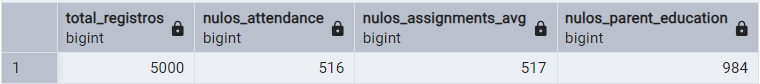  

Esta información será de relevancia más adelante.

---

### Número de Estudiantes por Departamento

SELECT department, COUNT(student_id) AS counter  
FROM students  
GROUP BY 1  
ORDER BY 2 DESC;  

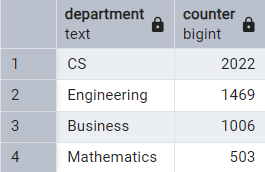  

---

### Promedio de Asistencia por Departamento

Para el caso de esta consulta, al contener valores nulos estos serán reemplazados por el promedio de cada departamento. 

Primero se determinará la cantidad de nulos que tiene cada departamento:

SELECT Department,   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;COUNT(*) AS Total_Registros,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;SUM(CASE WHEN "Attendance (%)" IS NULL THEN 1 ELSE 0 END) AS Nulos_Attendance  
FROM Students_Grading_Dataset  
GROUP BY Department  
ORDER BY Nulos_Attendance DESC;  

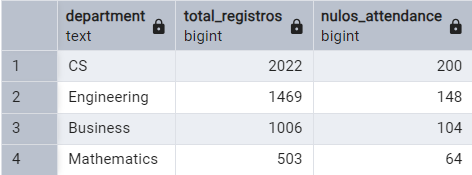  


Ahora se reemplazará cada valor nulo con el promedio del departamento al que pertenece:

UPDATE students AS t  
SET attendance = (  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;SELECT AVG(attendance)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FROM students   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHERE attendance IS NOT NULL   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;AND department = t.department  
)  
WHERE attendance IS NULL;  


Ahora se calcula el promedio para cada departamento:

SELECT department, ROUND(AVG(attendance)::numeric, 2) AS avg_attendance    
FROM students    
GROUP BY department    
ORDER BY avg_attendance DESC;  

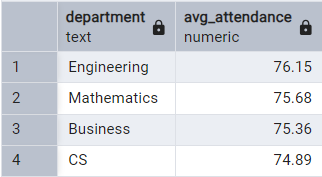  

---

### Número de Estudiantes con Estrés Mayor a 7

SELECT department, COUNT(stress_level)  
FROM students  
WHERE stress_level > 7  
GROUP BY 1  
ORDER BY 2 DESC;  

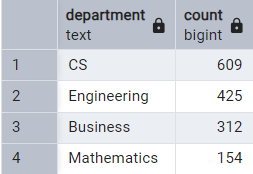

#### Porcentaje de Estudiantes con Estrés Mayor a 7

SELECT department,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ROUND(COUNT(CASE WHEN stress_level > 7 THEN 1 END) * 100.0 / COUNT(*), 2) AS stress_level_over_7  
FROM students  
GROUP BY department  
ORDER BY stress_level_over_7 DESC;  

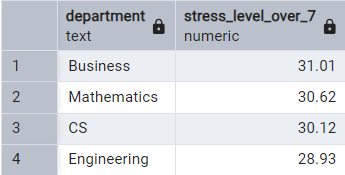

En terminos de porcentaje, el departamento con mayor estudiantes con estrés mayor a 7 es el de Business.

---

### Número de A's por Departamento

SELECT department, COUNT(grade) AS counter  
FROM students  
WHERE grade = 'A'  
GROUP BY 1  
ORDER BY 2 DESC;  
  
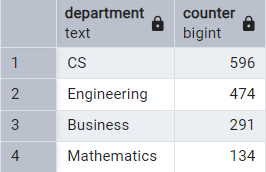  

Aquí se puede observar que CS es el departamento con mayor cantidad de A's obtenidas.


#### Porcentaje de A's por Departamento
SELECT department,   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ROUND(COUNT(CASE WHEN grade = 'A' THEN 1 END) * 100.0 / COUNT(*), 2 ) AS percentage  
FROM students  
GROUP BY department  
ORDER BY percentage DESC;  

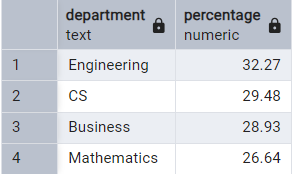

Al analizar el porcentaje de A's sobre el total de calificaciones, se observa que el departamento de Engineering es el que posee el mayor porcentaje de A's.

---

### Promedio de Estudiantes **Con** Acceso a Internet Vs **Sin** Acceso a Internet

SELECT internet_access,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ROUND(AVG(final_score)::numeric, 2) AS avg_final_score  
FROM students  
GROUP BY internet_access  
ORDER BY avg_final_score;  
  
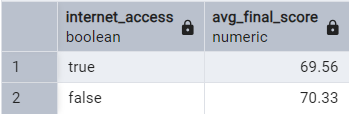

Se puede observar que el promedio para ambos es bastante similar.

---

### Desempeño por Horas de Estudio

El valor minimo de tiempo de dedicado a estudiar es de 5 horas. Y el valor maximo es de 30 horas. Teniendo un rango de 25 horas, con esto en mente se dividirán los valores en 5 intervalos de 5 horas.

SELECT   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;CASE  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN study_hours < 10 THEN '5 - 10'  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN study_hours < 15 THEN '10 - 15'  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN study_hours < 15 THEN '15 - 20'  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN study_hours < 15 THEN '20 - 25'  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ELSE '25 - 30'  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;END AS grupo,   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ROUND(AVG(final_score)::numeric, 2) AS avg_final_score  
FROM students  
GROUP BY grupo  
ORDER BY grupo ASC;  

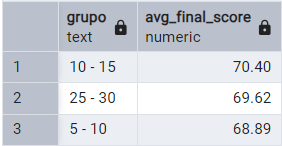  

Los tres grupos mostrados tienen un valor promedio de calificación final similar.

---

### Promedio de Estudiantes por Participación

SELECT   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;CASE  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN participation_score < 4 THEN 'Baja'  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN participation_score < 7 THEN 'Media'  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ELSE 'Alta'  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;END AS participation,   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ROUND(AVG(final_score)::numeric, 2) AS avg_final_score  
FROM students  
GROUP BY participation  
ORDER BY participation;  

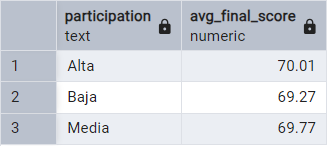

Este resultado permite observar que el promedio de todos los grupos de participación son similares.

---

### Comparación de Nivel de Estrés con Horas de Sueño

SELECT   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;CASE  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN sleep_hours < 3 THEN '0 - 3'  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN sleep_hours < 6 THEN '3 - 6'  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ELSE '6 - 9'  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;END AS grupo,   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ROUND(AVG(stress_level)::numeric, 2) AS avg_stress_level  
FROM students  
GROUP BY grupo  
ORDER BY avg_stress_level DESC;  


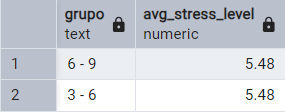

Se puede observar que el nivel de estrés es similar en los grupos de sueño.

---

### Promedio de Estudiantes que Participan en Actividades Extracurriculares Vs Aquellos que no

SELECT extracurricular_activities,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ROUND(AVG(final_score)::numeric, 2) AS avg_final_score  
FROM students  
GROUP BY extracurricular_activities  
ORDER BY avg_final_score;  

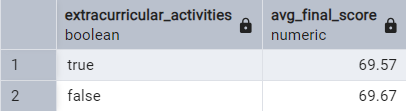

Se observa que en ambos grupos se presenta un promedio similar.

---

### Análisis de Nivel Educativo de los Padres y Rendimiento Academico

Antes de realizar el análisis se reemplazaron todos los valores nulos por un valor 'Unknown'.

SELECT parent_education,   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ROUND(AVG(final_score)::numeric, 2) AS avg_final_score  
FROM students  
GROUP BY parent_education  
ORDER BY avg_final_score DESC;  

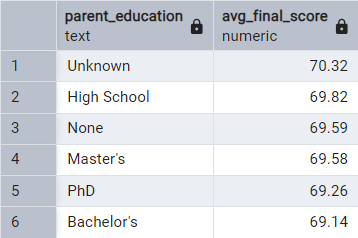

---

### Correlación entre Niveles de Estrés y Grade

Al Grade no estar expresado de manera númerica, se tuvo que realizar una conversión.

SELECT CORR(stress_level,   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;CASE   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN grade = 'A' THEN 4.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN grade = 'B' THEN 3.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN grade = 'C' THEN 2.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN grade = 'D' THEN 1.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN grade = 'F' THEN 0.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ELSE NULL  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;END) AS correlation  
FROM students;  

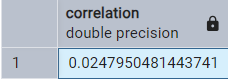

Como se observa en la imagen el resultado de la correlación es de 0.024 lo que indica que no existe una relación significativa entre ambas variables. Eso tambien se puede ver reflejado en el resultado de la siguiente consulta:  
 
SELECT stress_level,   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ROUND(AVG(  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;CASE   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN grade = 'A' THEN 4.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN grade = 'B' THEN 3.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN grade = 'C' THEN 2.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN grade = 'D' THEN 1.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN grade = 'F' THEN 0.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ELSE NULL  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;END  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;), 2) AS avg_grade_numeric  
FROM students  
GROUP BY stress_level  
ORDER BY stress_level;  

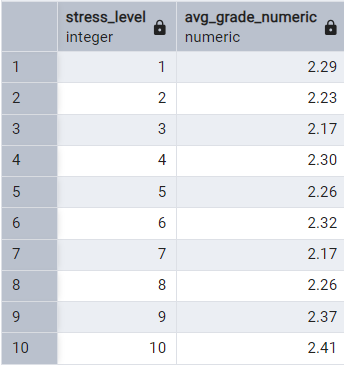  

En esta imagen se aprecia como apesar de incrementar el nivel de estrés, el promedio en el grade no varia mucho.

---

### Comparación del Promedio de Cada Estudiante con el Promedio del Grupo de Estrés

SELECT student_id,   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;stress_level,   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;total_score,   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ROUND(AVG(total_score) OVER (PARTITION BY stress_level)::NUMERIC, 2) AS avg_score_in_stress_level,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;CASE   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN total_score >= AVG(total_score) OVER (PARTITION BY stress_level) THEN 'Above Average'  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ELSE 'Below Average'  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;END AS performance_comparison  
FROM students;  

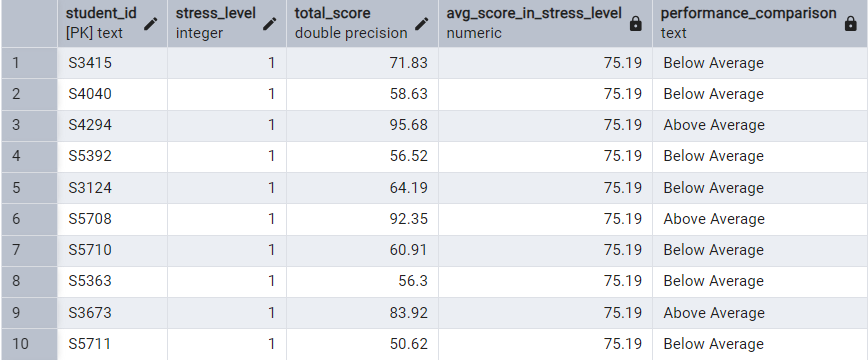

Solo se muestran los primeros 10 resultados, debido a su tamaño.

---

### Ranking de Estudiantes entre su grupo de Estrés

SELECT student_id,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;stress_level,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;total_score,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;RANK() OVER(PARTITION BY stress_level ORDER BY total_score DESC) AS rank_within_stress  
FROM students;  

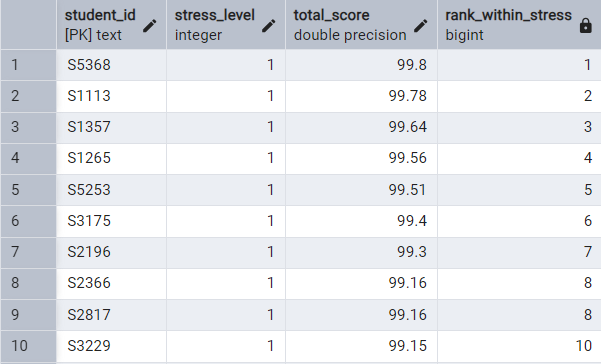

Al igual que en la anterior consulta, solo se muestran las primeras 10 filas arrojadas debido al tamaño.

---

# 📌 Conclusión: Un Análisis con Limitaciones, pero de Gran Valor Práctico

Al analizar este dataset, se observa una notable uniformidad en los promedios a lo largo de diversas categorías. Esto sugiere que los datos podrían haber sido generados con la intención de mantener una distribución equilibrada, lo que facilita la aplicación de técnicas analíticas, pero limita la posibilidad de identificar patrones diferenciadores significativos.

Si bien este ejercicio es una excelente oportunidad para desarrollar habilidades en SQL y análisis de datos, los resultados deben interpretarse con cautela, ya que el dataset no refleja necesariamente escenarios reales. No obstante, sigue siendo un recurso valioso para explorar consultas avanzadas, comprender relaciones entre variables y fortalecer el pensamiento analítico en el ámbito de la ciencia de datos. 🚀📊

---